# **LAB ATQ - MLPRegressor**

Este laboratorio tiene la finalidad de presentar un parcial, donde se hace cambios a un codigo de Quantiacs para usar un metodo de Machine Learning (ML).

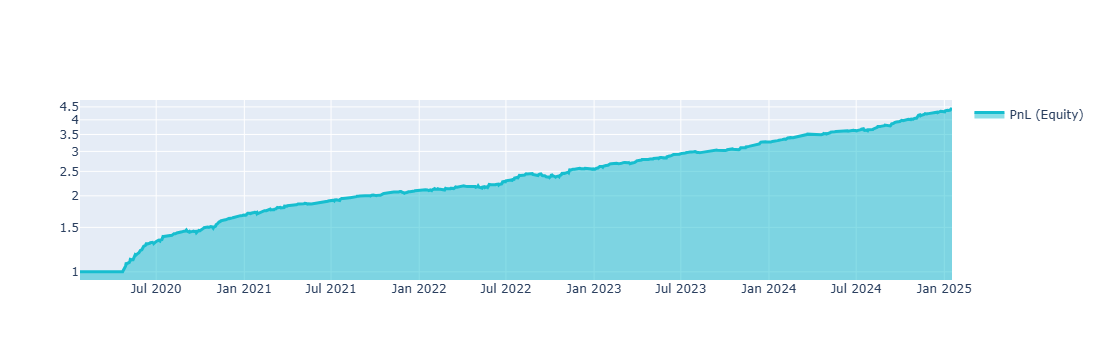

**sharpe_ratio**:	5.747888793464226

**The Machine Learning technique:** I'm using MLPRegressor, as a supervised ML is recomended to predict the market's price. it's a robust choice for regression tasks involving non-linear relationships and high-dimensional data.

**The market:** I'm using S&P500.

**The assets:** I'm working with all S&P500 assets.

**The variables:** I've modified one feature, and added new 4 presented below.
**Targets:**
        class_positive = 1 # prices goes up more than 0.1%
        class_neutral = 0 # prices goes up or don las that 0.1%
        class_negative = -1 # price goes down more than 0.1%

**Is_liquid:** Finally, it only trade with liquid prices.

In [ ]:
# loading s&p500 stock data

stock_data = qndata.stocks.load_spx_data(tail = 365 * 5)

In [ ]:
def get_features(data):
    """Builds the features used for learning:
       * a trend indicator;
       * the moving average convergence divergence;
       * a volatility measure;
       * the stochastic oscillator;
       * the relative strength index;
       * the logarithm of the closing price.
       These features can be modified and new ones can be added easily.

       NEW FEATURES ADDED
       * a wilder_ma;
       * a Volume Weighted Moving Average;
       * macd2's parameters were changed;
       * Rate of Change by himself;
       * and a Directional Movement System.
    """

    # trend:
    trend = qnta.roc(qnta.lwma(data.sel(field="close"), 60), 1)

    # moving average:
    wilder_ma = qnta.wilder_ma(data.sel(field="close"), 10)
    vwma = qnta.vwma(data.sel(field="close"), data.sel(field = "vol"), 10)


    # volatility:
    volatility = qnta.tr(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"))
    volatility = volatility / data.sel(field="close")
    volatility = qnta.lwma(volatility, 14)

    # the stochastic oscillator:
    k, d = qnta.stochastic(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"), 14)

    # oscillators:
    macd = qnta.macd(data.sel(field="close"))
    macd2_line, macd2_signal, macd2_hist = qnta.macd(data, 15, 28, 6) #cambio de variables
    rsi = qnta.rsi(data.sel(field="close"))
    roc = qnta.roc(data.sel(field="close"), 25)

    # index indicators:
    dms1,dms2,dms3,dms4 = qnta.dms(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"), 12, 16, 13)

    # the logarithm of the closing price:
    price = data.sel(field="close").ffill("time").bfill("time").fillna(0) # fill NaN
    price = np.log(price)

    # combine the six features:
    result = xr.concat(
        [trend, macd2_signal.sel(field="close"),volatility, d, rsi, roc, wilder_ma, vwma, dms2, price],
        pd.Index(
            ["trend",  "macd", "volatility", "stochastic_d", "rsi","roc", "wilder_ma", "vwma", "dms2", "price"],
            name = "field"
        )
    )

    return result.transpose("time", "field", "asset")

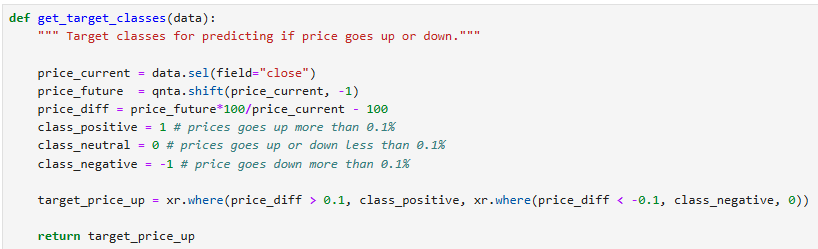

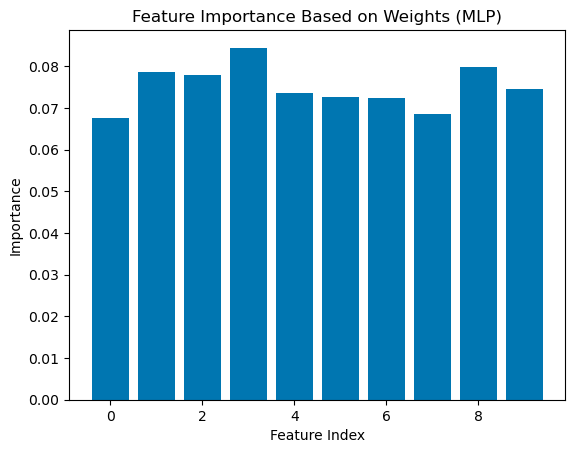